In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [2]:
import matplotlib
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [3]:
df = pd.read_excel("Report Data - Greece - 2017.xlsx")

In [4]:
df.head()

,Report data for year,Country,Bias motivation,Type of Crime,Recorded by Police
0,2017,Greece,Racism and xenophobia,Homicide,4
1,2017,Greece,Racism and xenophobia,Physical assault,32
2,2017,Greece,Racism and xenophobia,Incitement to violence,2
3,2017,Greece,Racism and xenophobia,Theft/ robbery,6
4,2017,Greece,Racism and xenophobia,Damage to property,7


In [5]:
df.isnull()

,Report data for year,Country,Bias motivation,Type of Crime,Recorded by Police
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
Report data for year    29 non-null int64
Country                 29 non-null object
Bias motivation         29 non-null object
Type of Crime           29 non-null object
Recorded by Police      29 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.2+ KB


In [7]:
print('Columns:', list(df.columns))

Columns: ['Report data for year', 'Country', 'Bias motivation', 'Type of Crime', 'Recorded by Police']


In [8]:
print('Shape', df.shape)

Shape (29, 5)


In [9]:
df.rename(columns={'Report data for year':'Year',
                  'Type of Crime':'TypeofInc',
                  'Bias motivation':'BiasMotiv',
                  'Recorded by Police': 'RbP'},
          inplace=True)

In [10]:
df.head()

,Year,Country,BiasMotiv,TypeofInc,RbP
0,2017,Greece,Racism and xenophobia,Homicide,4
1,2017,Greece,Racism and xenophobia,Physical assault,32
2,2017,Greece,Racism and xenophobia,Incitement to violence,2
3,2017,Greece,Racism and xenophobia,Theft/ robbery,6
4,2017,Greece,Racism and xenophobia,Damage to property,7


In [11]:
df.groupby('BiasMotiv').RbP.sum()

BiasMotiv
Anti-Semitism                                                         4
Bias against Christians                                               2
Bias against Muslims                                                  3
Bias against Roma and Sinti                                           6
Bias against members of other religions or beliefs                    4
Bias against other groups - Sexual orientation or gender identity    13
Bias against other groups – People with disabilities                  4
Racism and xenophobia                                                72
Name: RbP, dtype: int64

In [12]:
df.groupby('TypeofInc').RbP.sum()

TypeofInc
Arson                              3
Damage to property                14
Disturbance of the peace           5
Homicide                           4
Incitement to violence             4
Physical assault                  43
Theft/ robbery                    12
Threats/ threatening behaviour    20
Unspecified                        3
Name: RbP, dtype: int64

In [13]:
df_new = df.groupby('TypeofInc').RbP.sum().reset_index()
df_new

,TypeofInc,RbP
0,Arson,3
1,Damage to property,14
2,Disturbance of the peace,5
3,Homicide,4
4,Incitement to violence,4
5,Physical assault,43
6,Theft/ robbery,12
7,Threats/ threatening behaviour,20
8,Unspecified,3


In [14]:
df_new = df.groupby('TypeofInc').RbP.sum().reset_index()
total = df_new.RbP.sum()
df_new['percent'] = df_new.RbP/total *100

In [15]:
df_new

,TypeofInc,RbP,percent
0,Arson,3,2.777778
1,Damage to property,14,12.962963
2,Disturbance of the peace,5,4.629630
3,Homicide,4,3.703704
4,Incitement to violence,4,3.703704
5,Physical assault,43,39.814815
6,Theft/ robbery,12,11.111111
7,Threats/ threatening behaviour,20,18.518519
8,Unspecified,3,2.777778


In [16]:
df_new2 = df.groupby('BiasMotiv').RbP.sum().reset_index()
df_new2.head()

,BiasMotiv,RbP
0,Anti-Semitism,4
1,Bias against Christians,2
2,Bias against Muslims,3
3,Bias against Roma and Sinti,6
4,Bias against members of other religions or bel...,4


In [17]:
total = df_new2.RbP.sum()
df_new2['percent'] = df_new2.RbP/total *100

In [18]:
df_new2

,BiasMotiv,RbP,percent
0,Anti-Semitism,4,3.703704
1,Bias against Christians,2,1.851852
2,Bias against Muslims,3,2.777778
3,Bias against Roma and Sinti,6,5.555556
4,Bias against members of other religions or bel...,4,3.703704
5,Bias against other groups - Sexual orientation...,13,12.037037
6,Bias against other groups – People with disabi...,4,3.703704
7,Racism and xenophobia,72,66.666667


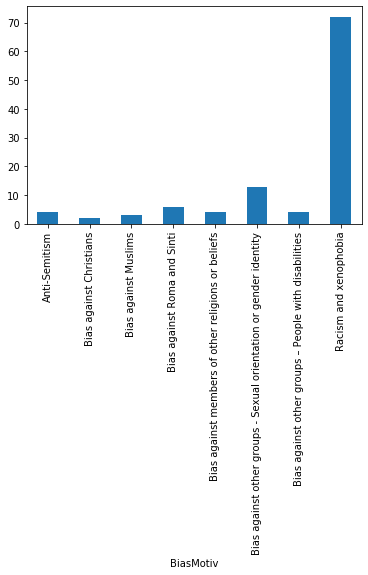

In [41]:
df.groupby(by=['BiasMotiv']).RbP.sum().plot(x='BiasMotive',kind='bar')
plt.savefig("PoliceBM.pdf")


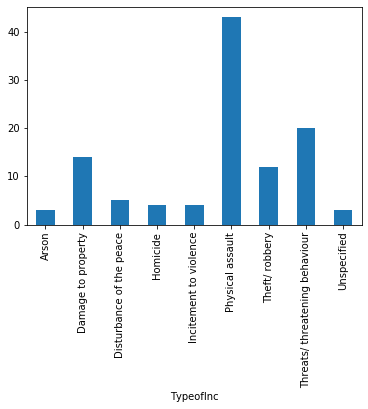

In [20]:
df.groupby(by=['TypeofInc']).RbP.sum().plot(x='TypeofInc',kind='bar')
plt.savefig("PoliceToInc.pdf")

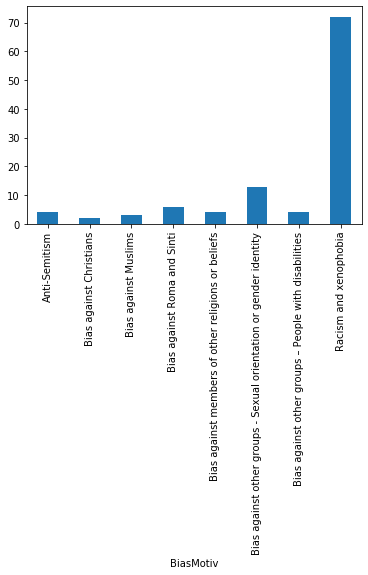

In [21]:
df.groupby(by=['BiasMotiv']).RbP.sum().plot(x='BiasMotiv',kind='bar')
plt.savefig("PoliceToInc.pdf")

In [22]:
df2016 = pd.read_excel("Report Data - Greece - 2016.xlsx")
df2016.head()

,Report data for year,Country,Bias motivation,Type of Crime,Recorded by Police
0,2016,Greece,Racism and xenophobia,Physical assault,22
1,2016,Greece,Racism and xenophobia,Incitement to violence,1
2,2016,Greece,Racism and xenophobia,Theft/ robbery,1
3,2016,Greece,Racism and xenophobia,Damage to property,1
4,2016,Greece,Racism and xenophobia,Threats/ threatening behaviour,10


In [23]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
Report data for year    14 non-null int64
Country                 14 non-null object
Bias motivation         14 non-null object
Type of Crime           14 non-null object
Recorded by Police      14 non-null int64
dtypes: int64(2), object(3)
memory usage: 640.0+ bytes


In [24]:
df2016.rename(columns={'Report data for year':'Year',
                  'Type of Crime':'TypeofInc',
                  'Bias motivation':'BiasMotiv',
                       'Recorded by Police':'RbP'},
                inplace=True)

In [25]:
df2016.head()

,Year,Country,BiasMotiv,TypeofInc,RbP
0,2016,Greece,Racism and xenophobia,Physical assault,22
1,2016,Greece,Racism and xenophobia,Incitement to violence,1
2,2016,Greece,Racism and xenophobia,Theft/ robbery,1
3,2016,Greece,Racism and xenophobia,Damage to property,1
4,2016,Greece,Racism and xenophobia,Threats/ threatening behaviour,10


In [26]:
df2016['Year'] = pd.to_datetime(df2016.Year) 

In [27]:
df2016['Year']= df2016.Year.dt.year

In [28]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
Year         14 non-null int64
Country      14 non-null object
BiasMotiv    14 non-null object
TypeofInc    14 non-null object
RbP          14 non-null int64
dtypes: int64(2), object(3)
memory usage: 640.0+ bytes


In [29]:
df2016.groupby('BiasMotiv').RbP.sum()

BiasMotiv
Anti-Semitism                                                         2
Bias against Christians                                               1
Bias against Muslims                                                  2
Bias against members of other religions or beliefs                    5
Bias against other groups - Sexual orientation or gender identity     1
Racism and xenophobia                                                35
Name: RbP, dtype: int64

In [30]:
df2016.groupby('TypeofInc').RbP.sum()

TypeofInc
Attacks against places of worship     3
Damage to property                    2
Incitement to violence                3
Physical assault                     25
Theft/ robbery                        1
Threats/ threatening behaviour       11
Vandalism                             1
Name: RbP, dtype: int64

In [31]:
df_newBM2016 = df2016.groupby('BiasMotiv').RbP.sum().reset_index()
df_newBM2016.head()

,BiasMotiv,RbP
0,Anti-Semitism,2
1,Bias against Christians,1
2,Bias against Muslims,2
3,Bias against members of other religions or bel...,5
4,Bias against other groups - Sexual orientation...,1


In [32]:
total = df_newBM2016.RbP.sum()
df_newBM2016['percent'] = df_newBM2016.RbP/total *100

In [33]:
df_newBM2016.head()

,BiasMotiv,RbP,percent
0,Anti-Semitism,2,4.347826
1,Bias against Christians,1,2.173913
2,Bias against Muslims,2,4.347826
3,Bias against members of other religions or bel...,5,10.869565
4,Bias against other groups - Sexual orientation...,1,2.173913


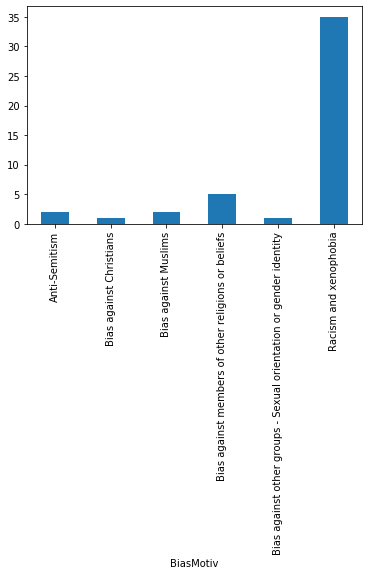

In [34]:
df_newBM2016.groupby(by=['BiasMotiv']).RbP.sum().plot(x='BiasMotiv',kind='bar')
plt.savefig("PoliceBiasMotiv2016.pdf")

In [35]:
df_newToI2016 = df2016.groupby('TypeofInc').RbP.sum().reset_index()

In [36]:
df_newToI2016.head()

,TypeofInc,RbP
0,Attacks against places of worship,3
1,Damage to property,2
2,Incitement to violence,3
3,Physical assault,25
4,Theft/ robbery,1


In [37]:
total = df_newToI2016.RbP.sum()
df_newToI2016['percent'] = df_newToI2016.RbP/total *100

In [38]:
df_newToI2016.head()

,TypeofInc,RbP,percent
0,Attacks against places of worship,3,6.521739
1,Damage to property,2,4.347826
2,Incitement to violence,3,6.521739
3,Physical assault,25,54.347826
4,Theft/ robbery,1,2.173913


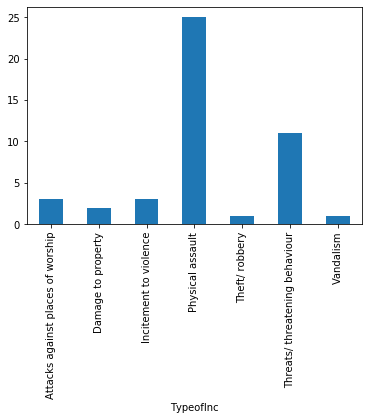

In [39]:
df_newToI2016.groupby(by=['TypeofInc']).RbP.sum().plot(x='TypeofInc',kind='bar')
plt.savefig("PoliceToInc2016.pdf")